In [27]:
import os
import csv
import pandas as pd
import re
from dask import dataframe as dd

In [28]:
#Regex for finding category name
def categoryName(text):
    #text = '{"id":292,"name":"Comedy","analytics_name":"Comedy","slug":"film & video/comedy","position":3,"parent_id":11,"parent_name":"Film & Video","color":16734574,"urls":{"web":{"discover":"http://www.kickstarter.com/discover/categories/film%20&%20video/comedy"}}}'
    r = re.search("([A-Z])\w+", text)
    return r.group(0)

In [29]:
#read the file:
#df = pd.read_csv("DECEMBER2022.csv")

ddf = dd.read_csv("data/*.csv")
data = ddf[["category","launched_at", "name", "state"]]

df = data.compute()

df = df[df.launched_at != 0]

# Convert the 'date' column to datetime
df['launched_at'] = pd.to_datetime(df['launched_at'], unit='s')

df['month'] = df['launched_at'].dt.month
df['year'] = df['launched_at'].dt.year

#make indices again:
df.set_index(['year','month'], inplace=True)

df['category'] = df['category'].map(lambda x: categoryName(x))

df

#iterate over the grouped dataframe and create separate dataframe
#for name, group in df_grouped:
#    print(name)
 #   print(group)

category         launched_at  \
year month                                
2022 12      Comedy 2022-12-09 02:52:44   
     12      Comedy 2022-12-08 10:32:36   
     12      Comedy 2022-12-07 22:07:37   
     12      Comedy 2022-12-06 13:59:22   
     12      Comedy 2022-12-03 02:49:41   
...             ...                 ...   
2020 3      Graphic 2020-03-13 18:11:29   
     3      Graphic 2020-03-12 22:49:03   
     3      Graphic 2020-03-11 13:30:03   
     3      Graphic 2020-03-11 00:00:03   
     3      Graphic 2020-03-10 21:55:31   

                                                        name       state  
year month                                                                
2022 12            Driving School Stories of Celebrity Teens      failed  
     12                 Crime Squad 3D Blu-ray - REMASTER3D!        live  
     12                          Help Us Get To Los Angeles!        live  
     12                                               SECRET        live  
     12                                    PINK (Short Film)        live  
...                                                      ...         ...  
2020 3                                             Fairy Boy  successful  
     3      Crucifix Executioner : The Epic 1hr Motion Comic  successful  
     3                              Ghost of the Gulag Vol.2  successful  
     3                              You're Stuck With Me Now  successful  
     3                                  Dino Beasts - book 2  successful  

[7631 rows x 4 columns]

In [30]:
df.sort_index(inplace=True)
df.reset_index(level='month', inplace=True)
df.reset_index(level='year', inplace=True)
df

,year,month,category,launched_at,name,state
0,2009,9,Webcomics,2009-09-13 20:04:59,Join the Multiplex: Book 1 Club of Awesome,successful
1,2009,12,Photo,2009-12-03 00:55:24,The Pixel Project: Impel an Aspiring Photojour...,successful
2,2010,4,Audio,2010-04-16 15:47:51,You Down with YPP?,successful
3,2010,5,Music,2010-05-04 13:11:30,Start a musical REVOLUTION with Collette!,successful
4,2010,7,Spaces,2010-07-19 21:26:13,Help SHE&HER PRODUCTIONS raise money for our n...,successful
...,...,...,...,...,...,...
7626,2022,12,Graphic,2022-12-01 23:00:22,Diet by Ignacio Noé and published by Embassy P...,live
7627,2022,12,Graphic,2022-12-01 21:13:17,Infinity City - A Sci-Fi Western Comic,live
7628,2022,12,Graphic,2022-12-01 15:33:48,Darkest Rout: Book One | A Graphic Novel,live
7629,2022,12,Graphic,2022-12-01 14:21:06,Bug Fight Comic Page,live


In [31]:
# Create a new column 'year_month' by concatenating the 'year' and 'month' columns
df['year_month'] = df['year'].astype(str) + '-' + df['month'].astype(str)

# If you want to keep the format of year-month-date
#df['year_month'] = pd.to_datetime(df[['year','month']].assign(day=1))

# drop the 'year' and 'month' columns
#df = df.drop(columns=['year', 'month'])

df.groupby('year_month')
df

,year,month,category,launched_at,name,state,year_month
0,2009,9,Webcomics,2009-09-13 20:04:59,Join the Multiplex: Book 1 Club of Awesome,successful,2009-9
1,2009,12,Photo,2009-12-03 00:55:24,The Pixel Project: Impel an Aspiring Photojour...,successful,2009-12
2,2010,4,Audio,2010-04-16 15:47:51,You Down with YPP?,successful,2010-4
3,2010,5,Music,2010-05-04 13:11:30,Start a musical REVOLUTION with Collette!,successful,2010-5
4,2010,7,Spaces,2010-07-19 21:26:13,Help SHE&HER PRODUCTIONS raise money for our n...,successful,2010-7
...,...,...,...,...,...,...,...
7626,2022,12,Graphic,2022-12-01 23:00:22,Diet by Ignacio Noé and published by Embassy P...,live,2022-12
7627,2022,12,Graphic,2022-12-01 21:13:17,Infinity City - A Sci-Fi Western Comic,live,2022-12
7628,2022,12,Graphic,2022-12-01 15:33:48,Darkest Rout: Book One | A Graphic Novel,live,2022-12
7629,2022,12,Graphic,2022-12-01 14:21:06,Bug Fight Comic Page,live,2022-12


In [32]:
# Create a new DataFrame to store the results
results_df = pd.DataFrame(columns=['date','percentage_successful'])

months = df['year_month'].unique()

results_list = []

for month in months:
    total_cases = 0
    successful_cases = 0
    for index, row in df.iterrows():
        if row['year_month'] == month:
            total_cases += 1
            if row['state'] == 'successful':
                successful_cases += 1
    percentage_successful = (successful_cases / total_cases) * 100
    data = [[month, percentage_successful]]
    dftemp = pd.DataFrame(data, columns=['date', 'percentage_successful'])
    results_list.append(dftemp)
#results_list    
# Append the results to the new DataFrame
results_df = pd.concat(results_list, ignore_index=True)

results_df

,date,percentage_successful
0,2009-9,100.000000
1,2009-12,100.000000
2,2010-4,100.000000
3,2010-5,100.000000
4,2010-7,100.000000
...,...,...
139,2022-8,94.676806
140,2022-9,94.921875
141,2022-10,87.538941
142,2022-11,34.049080


In [33]:
results_df[['Year', 'Month']] = results_df['date'].str.split('-', 1, expand=True)
results_df

C:\Users\Andrei\AppData\Local\Temp\ipykernel_9424\549180942.py:1: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  results_df[['Year', 'Month']] = results_df['date'].str.split('-', 1, expand=True)


,date,percentage_successful,Year,Month
0,2009-9,100.000000,2009,9
1,2009-12,100.000000,2009,12
2,2010-4,100.000000,2010,4
3,2010-5,100.000000,2010,5
4,2010-7,100.000000,2010,7
...,...,...,...,...
139,2022-8,94.676806,2022,8
140,2022-9,94.921875,2022,9
141,2022-10,87.538941,2022,10
142,2022-11,34.049080,2022,11


<AxesSubplot: xlabel='date'>

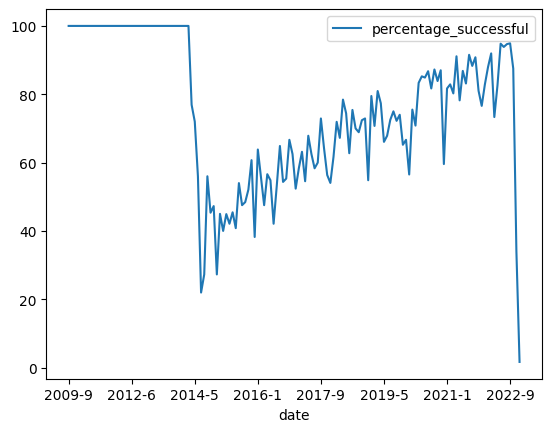

In [34]:
results_df.plot(x='date', y='percentage_successful', kind='line')